In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('netflix_titles.csv')

In [3]:
df.head()        
# See the first 5 rows


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()        # Check data types and missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.describe()    # Summary stats for numerical columns


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
df.describe(include='object')  # for strings/categorical


,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [6]:
df.shape         # Number of rows and columns


(8807, 12)

In [7]:
df.isnull().sum()          # Count missing values per column



show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
# Fill categorical missing values
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)


C:\Users\mkjai\AppData\Local\Temp\ipykernel_21112\1098297209.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
C:\Users\mkjai\AppData\Local\Temp\ipykernel_21112\1098297209.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

For numerical columns (not in your dataset but good to know)
df['column_name'].fillna(df['column_name'].mean(), inplace=True)  # or median

In [11]:
df.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)
#Use this when missing data is very small or not critical


convert 'September 9, 2019', 'July 15, 2018', ...
 to 
 2019-09-09, 2018-07-15, ...
df['date_added'] = pd.to_datetime(df['date_added'])
but here it does not work out beacause dates are in here strings have extra spaces at the start (or end), like " August 4, 2017" instead of "August 4, 2017 

In [13]:
df['date_added'] = df['date_added'].str.strip()


df['date_added'] → selects the date_added column from your DataFrame.

.str → tells Pandas: “treat this column as strings (text)” so we can apply string operations.

.strip() → removes all leading and trailing spaces from each string in that column.

In [16]:
df['date_added'] = pd.to_datetime(df['date_added'])


In [15]:
df['date_added'].isnull().sum()


0

In [19]:
import matplotlib.pyplot as plt
print(plt.style.available)



['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [22]:
import matplotlib.pyplot as plt


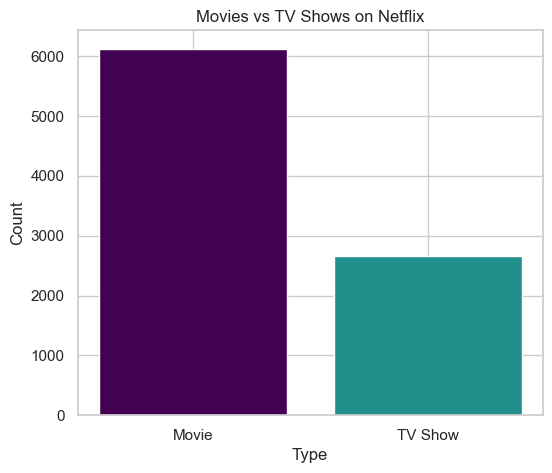

type
Movie      69.692833
TV Show    30.307167
Name: proportion, dtype: float64


In [23]:
type_counts = df['type'].value_counts()

plt.figure(figsize=(6,5))
plt.bar(type_counts.index, type_counts.values, color=['#440154', '#21908d'])
plt.title('Movies vs TV Shows on Netflix')
plt.ylabel('Count')
plt.xlabel('Type')
plt.show()

# Optional: percentage
type_percent = df['type'].value_counts(normalize=True) * 100
print(type_percent)
#Ratio of Movies vs TV Shows, see what dominates.

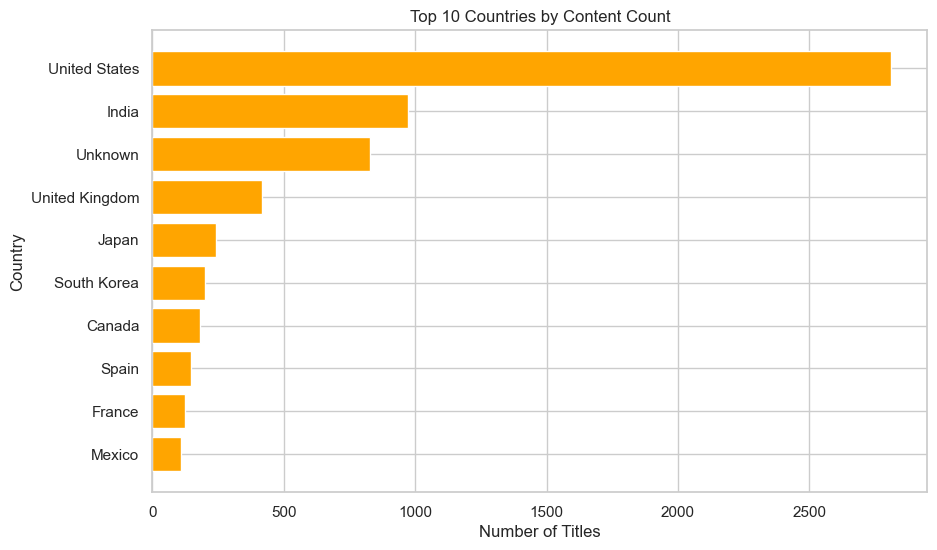

In [24]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
plt.barh(top_countries.index[::-1], top_countries.values[::-1], color='orange')
plt.title('Top 10 Countries by Content Count')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()
#shows which countries produce the most content.


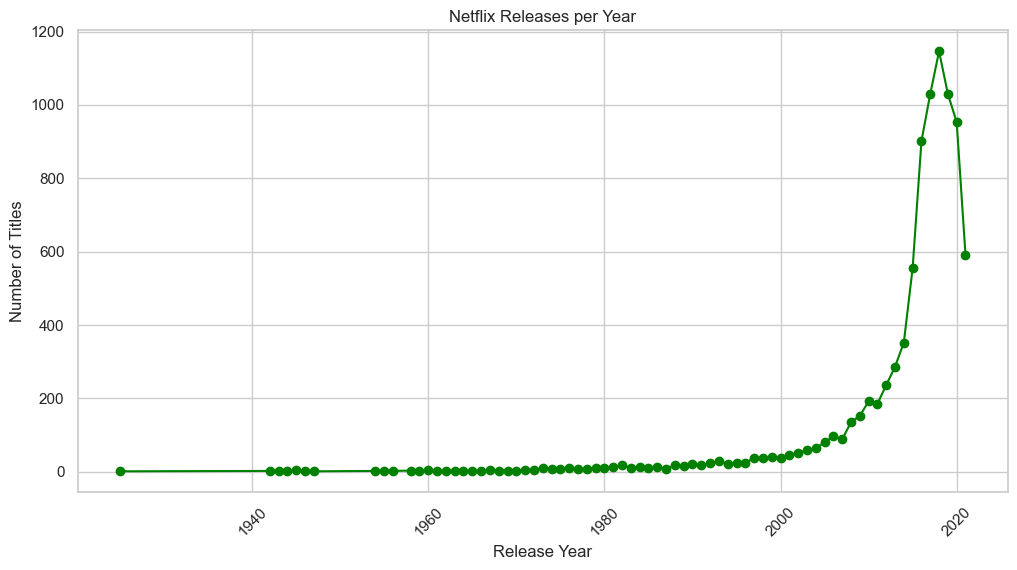

In [25]:
release_counts = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.plot(release_counts.index, release_counts.values, marker='o', color='green')
plt.title('Netflix Releases per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()
#Shows growth of Netflix catalog over time.

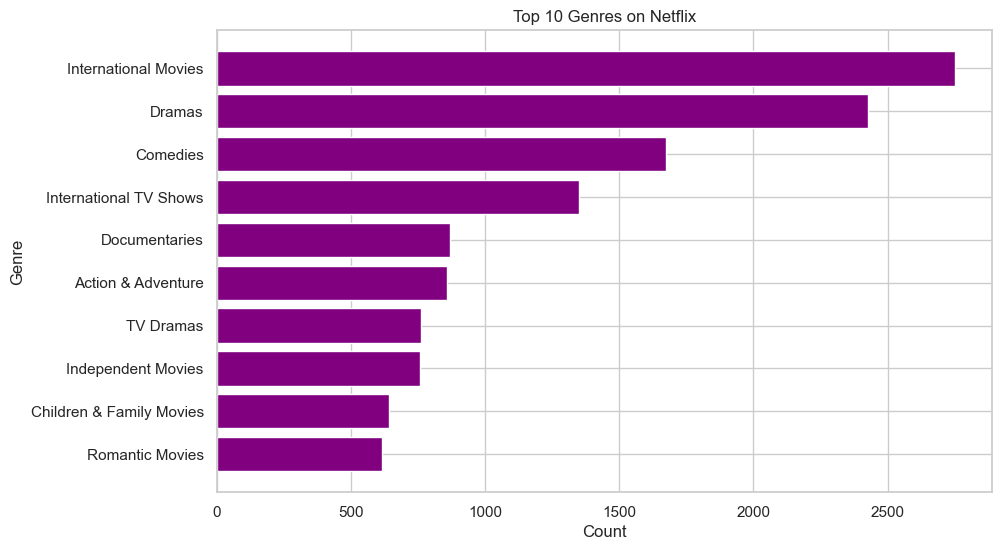

In [26]:
genres_series = df['listed_in'].str.split(', ').explode()
top_genres = genres_series.value_counts().head(10)

plt.figure(figsize=(10,6))
plt.barh(top_genres.index[::-1], top_genres.values[::-1], color='purple')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()
#Most common genres like Drama, Comedy, Documentary.

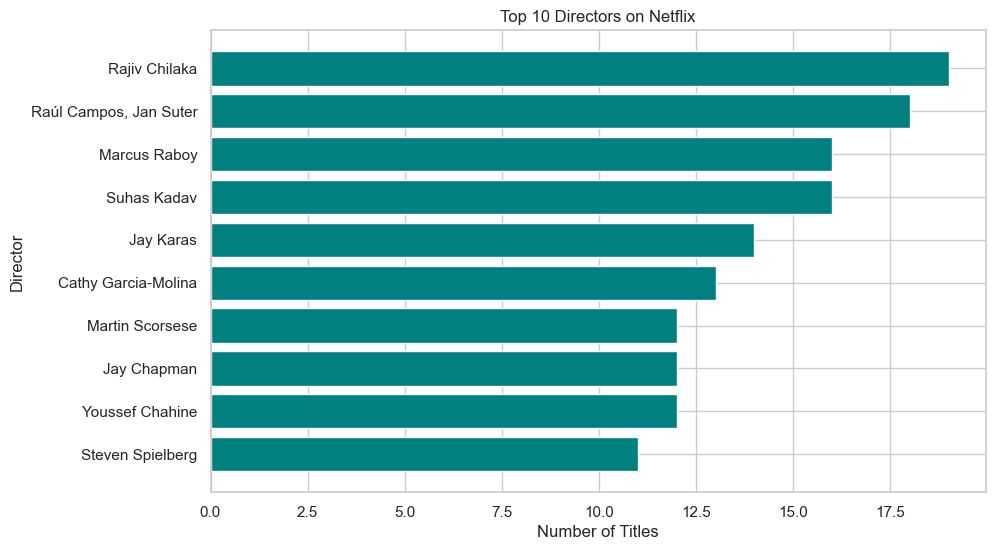

In [27]:
directors_series = df['director'].replace('Unknown', pd.NA).dropna()
top_directors = directors_series.value_counts().head(10)

plt.figure(figsize=(10,6))
plt.barh(top_directors.index[::-1], top_directors.values[::-1], color='teal')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()
#Shows prolific directors.

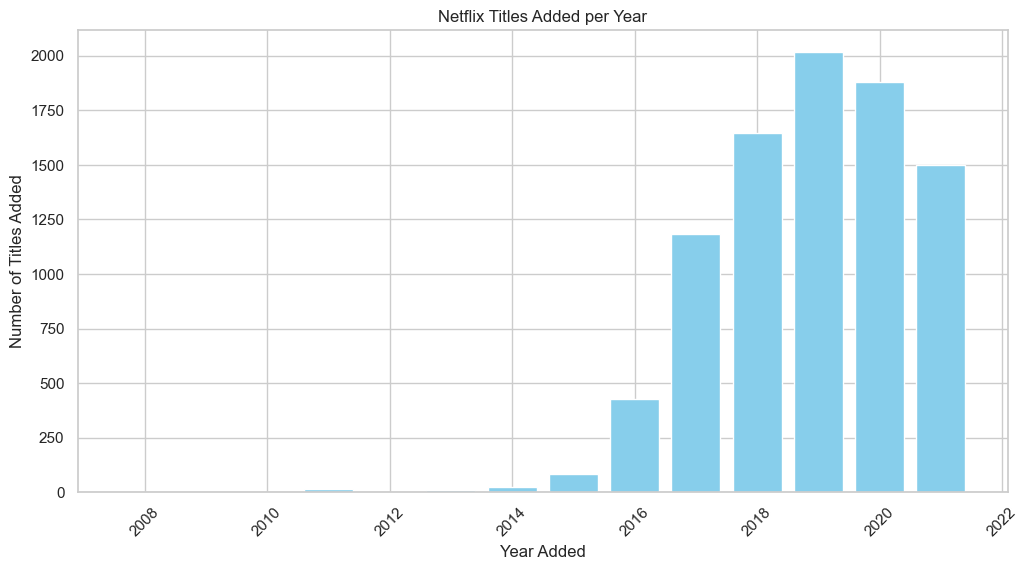

In [28]:
df['year_added'] = df['date_added'].dt.year
added_trend = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.bar(added_trend.index, added_trend.values, color='skyblue')
plt.title('Netflix Titles Added per Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.show()
#Shows Netflix’s investment in new content over time.

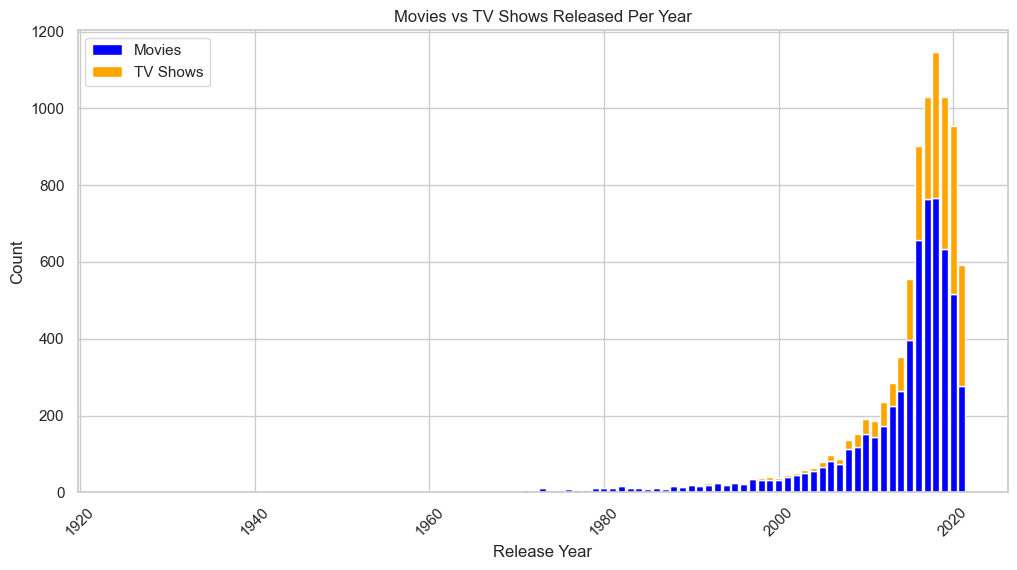

In [29]:
release_years = sorted(df['release_year'].unique())
movies_counts = [len(df[(df['release_year']==year) & (df['type']=='Movie')]) for year in release_years]
tv_counts = [len(df[(df['release_year']==year) & (df['type']=='TV Show')]) for year in release_years]

plt.figure(figsize=(12,6))
plt.bar(release_years, movies_counts, color='blue', label='Movies')
plt.bar(release_years, tv_counts, bottom=movies_counts, color='orange', label='TV Shows')
plt.title('Movies vs TV Shows Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.show()
#Compare Movies vs TV Shows over the years.